In [1]:
import pandas as pd               
import numpy as np               
import matplotlib.pyplot as plt   
import seaborn as sns             

%matplotlib inline

In [2]:
import pandas as pd
data = pd.read_csv("/Users/alenazaharova/Desktop/Zaharova_Alena_home_data.csv")
print(data)

               id             date    price  bedrooms  bathrooms  sqft_living  \
0      7129300520  20141013T000000   221900         3       1.00         1180   
1      6414100192  20141209T000000   538000         3       2.25         2570   
2      5631500400  20150225T000000   180000         2       1.00          770   
3      2487200875  20141209T000000   604000         4       3.00         1960   
4      1954400510  20150218T000000   510000         3       2.00         1680   
5      7237550310  20140512T000000  1225000         4       4.50         5420   
6      1321400060  20140627T000000   257500         3       2.25         1715   
7      2008000270  20150115T000000   291850         3       1.50         1060   
8      2414600126  20150415T000000   229500         3       1.00         1780   
9      3793500160  20150312T000000   323000         3       2.50         1890   
10     1736800520  20150403T000000   662500         3       2.50         3560   
11     9212900260  20140527T

In [3]:
# Для начала я выкину ненужные переменные

data = data.drop('id', axis=1)

In [4]:
data = data.drop('zipcode', axis=1)

In [5]:
data.head( )

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [6]:
# Ура! Их не оказалось

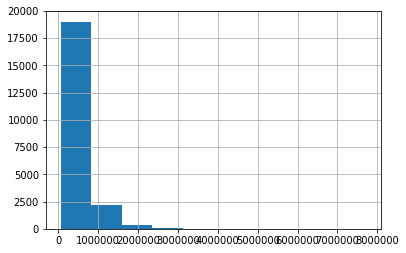

In [7]:
# Посмотрим как выглядит распределение цен.

data.price.hist()

In [8]:
# Хвост оказалось очень длинным, как и следовало ожидать, так как в выборке встречаются квартиры с довольно большой стоимостью. Такие наблюдения называются выбросами. Поэтому нужно сгладить распределние цен, прологарифмировав эту переменную. 

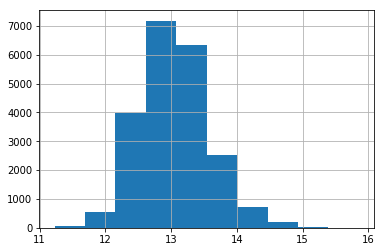

In [9]:
data['price'] = np.log(data['price'])
data.price.hist()

In [10]:
# Теперь перейдём к предобработке категориальных переменных.

In [11]:
# Для начала из date сделаем datetime формат

data['date'] = pd.to_datetime(data['date'])

In [12]:
# Затем вытаскиваем месяц и год, чтобы сделать из них категориальные переменные.
data["month"] = data.date.apply(lambda row: row.month)

In [13]:
data["year"] = data.date.apply(lambda row: row.year)


In [14]:
# Обязательно дропаем date, а то ничего не получится. 
data = data.drop('date', axis=1)

In [15]:
# Подсчитаем, сколько уникальных значений принимает каждая переменная

len(data['month'].unique())

12

In [16]:
len(data['year'].unique())

2

In [17]:
len(data['waterfront'].unique())

2

In [18]:
len(data['view'].unique())

5

In [19]:
len(data['grade'].unique())

12

In [20]:
len(data['condition'].unique())

5

In [21]:
# Отлично! Они все меньше 20. Значит к ним можно применить One Hot Encoding. 

In [22]:
dummies = pd.get_dummies(data['month'], prefix='month', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['month'], axis=1, inplace=True)

In [23]:
dummies = pd.get_dummies(data['year'], prefix='year', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['year'], axis=1, inplace=True)

In [24]:
dummies = pd.get_dummies(data['waterfront'], prefix='waterfront', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['waterfront'], axis=1, inplace=True)

In [25]:
dummies = pd.get_dummies(data['view'], prefix='view', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['view'], axis=1, inplace=True)

In [26]:
dummies = pd.get_dummies(data['grade'], prefix='grade', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['grade'], axis=1, inplace=True)

In [27]:
dummies = pd.get_dummies(data['condition'], prefix='condition', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['condition'], axis=1, inplace=True)

In [28]:
# Посмотрим, как всё выглядит

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,condition_2,condition_3,condition_4,condition_5
0,12.309982,3,1.00,1180,5650,1.0,1180,0,1955,0,...,0,0,0,0,0,0,0,1,0,0
1,13.195614,3,2.25,2570,7242,2.0,2170,400,1951,1991,...,0,0,0,0,0,0,0,1,0,0
2,12.100712,2,1.00,770,10000,1.0,770,0,1933,0,...,0,0,0,0,0,0,0,1,0,0
3,13.311329,4,3.00,1960,5000,1.0,1050,910,1965,0,...,0,0,0,0,0,0,0,0,0,1
4,13.142166,3,2.00,1680,8080,1.0,1680,0,1987,0,...,1,0,0,0,0,0,0,1,0,0


In [29]:
# Теперь делим данные на тренировочные и тестовые

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.3)

price_train = data_train['price']
price_test = data_test['price']

X_train = data_train.drop(['price'], axis=1)
X_test = data_test.drop(['price'], axis=1)

In [30]:
# Посмотрим на их размеры

data_train.shape

(15129, 46)

In [31]:
data_test.shape

(6484, 46)

In [32]:
# А теперь учим на трэйне скалировщик скалировать, чтобы стохастический градиентый спуск быстрее обучил нашу регрессию.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(data_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
# Применяем скалировщик к трэйну и к тесту.

data_train_scale = scaler.transform(data_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']])
data_test_scale = scaler.transform(data_test[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']])

In [35]:
# Заменяем значения на роскалированные 

data_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']] = data_train_scale
data_test[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']] = data_test_scale

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [36]:
# Снова размерчики.

print(data_train.shape) 
print(data_test.shape)

(15129, 46)
(6484, 46)


In [37]:
data_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,condition_2,condition_3,condition_4,condition_5
5928,13.173056,-1.459998,-0.144141,-0.572884,-0.308683,0.011190,-0.286212,-0.655815,-2.423764,-0.208789,...,0,0,0,0,0,0,0,0,1,0
17313,12.491064,-0.396065,0.506527,-0.638132,-0.273300,0.936269,-0.358531,-0.655815,1.056676,-0.208789,...,0,0,0,0,0,0,0,1,0,0
6813,12.220961,-0.396065,-0.794809,-0.953499,-0.143563,-0.913889,-0.949134,-0.202504,-0.274081,-0.208789,...,0,0,0,0,0,0,0,1,0,0
10340,12.821258,-1.459998,-1.445477,-0.877376,-0.333279,2.786427,-0.623700,-0.655815,0.988432,-0.208789,...,0,0,0,0,0,0,0,1,0,0
19496,12.765688,-0.396065,-1.445477,-0.170519,-0.202780,-0.913889,-0.563434,0.704119,-0.410569,-0.208789,...,0,0,0,0,0,0,0,1,0,0


In [38]:
# Вытаскиваем цены и параметры квартир по разным переменным для удобства 

y_train = data_train.price 
y_test = data_test.price 

X_train = data_train.drop('price', axis=1).get_values()
X_test = data_test.drop('price', axis=1).get_values()

In [39]:
# А теперь самый глупый прогноз! Будем говорить, что стоимость любой квартиры равна среднему значению

In [40]:
# посчитаем среднее 
y_mean = np.mean(y_train)                      

# спрогнозируем им цену всех квартир в тестовой выборке
y_pred_naive = np.ones(len(y_test)) * y_mean  
y_pred_naive[:5]

array([13.04678239, 13.04678239, 13.04678239, 13.04678239, 13.04678239])

In [41]:
# Перейдём к метрикам. Узнаем, насколько этот прогноз хорош.

In [42]:
from sklearn import metrics

In [43]:
# Средняя абсолютная ошибка - это средняя сумма рублей, на которую мы облажались.

metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_naive))

219805.0526917176

In [44]:
# Средняя квадратичная ошибка. Смысл этой метрики в том, чтобы штрафовать за большие ошибки сильнее, чем за маленькие. В рублях.
metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive))

132516254858.65018

In [45]:
# Средняя абсолютная процентная ошибка. Метрика, которая отлавливает процентную ошибку.
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred_naive)

3.1287039175619245

In [46]:
# Коэффициент детерминации. Эта метрика отражает, какую долю дисперсии объясняемой переменной мы объяснили с помощью нашей модели.
metrics.r2_score(y_test, y_pred_naive)

-4.382312802952981e-05

In [47]:
# А теперь для удобства закинем все метрики в одну общую функцию

In [48]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [49]:
print_metrics(y_test, y_pred_naive)

MAE: 219805.0526917176
RMSE: 364027.82154479646
R2: -4.382312802952981e-05
MAPE: 3.1287039175619245


In [50]:
# Строим нашу первую регрессию!¶

In [51]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке
y_pred_regr = model_regression.predict(X_test)

In [52]:
# Посмотрим на качество прогнозов. Мы стали ошибаться меньше, чем раньше.
print_metrics(y_test,y_pred_regr)

MAE: 108289.80931682234
RMSE: 179844.54916055544
R2: 0.7696689290574366
MAPE: 1.4739127205188776


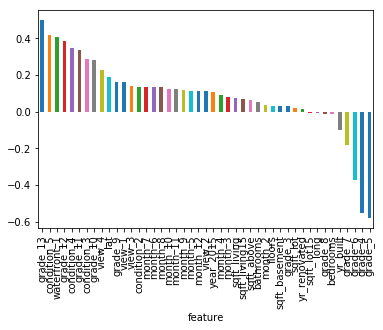

In [53]:
# Посмотрим на то, какие признаки вносят в цену наибольший вклад.

featureImportance = pd.DataFrame({"feature": data.drop('price',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [54]:
# Случайный лес

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Объявили лес из 100 деревьев
rf = RandomForestRegressor(n_estimators=100)

# Обучили лес 
rf.fit(X_train, y_train)

# Сделали по лесу прогнозы 
y_pred_forest = rf.predict(X_test)

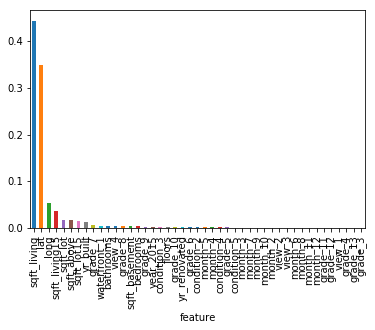

In [56]:
# Посмотрим на важность факторов.

featureImportance = pd.DataFrame({"feature": data.drop('price',axis=1).columns, 
                                  "importance": rf.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [57]:
rf = RandomForestRegressor()
estimators = ('n_estimator')

In [ ]:
# А теперь сравним все модели между собой.

In [58]:
print_metrics(y_test,y_pred_naive)

MAE: 219805.0526917176
RMSE: 364027.82154479646
R2: -4.382312802952981e-05
MAPE: 3.1287039175619245


In [59]:
print_metrics(y_test,y_pred_regr)

MAE: 108289.80931682234
RMSE: 179844.54916055544
R2: 0.7696689290574366
MAPE: 1.4739127205188776


In [60]:
print_metrics(y_test,y_pred_forest)

MAE: 70951.4664633469
RMSE: 129257.1122579124
R2: 0.8793434114336168
MAPE: 0.9755735733445223


In [61]:
# Случайные лес оказался самым эффективным.